# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [ ]:
datapath = r'/content/drive/MyDrive/Group05/Regression/BivariateData/5.csv'

In [ ]:
dataset = np.loadtxt(datapath,delimiter=",")
print(dataset.shape)

(10201, 3)


In [ ]:
def plot(data):  
  x , y , z = data[:,0] , data[:,1] , data[:,2]
  fig = plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")
 
  # Creating plot
  ax.scatter3D(x, y, z, color = "yellow" , edgecolor="black")
  # show plot  
  plt.title("Bivariate Dataset")
  plt.savefig("/content/drive/MyDrive/Group05/results/2D.png")

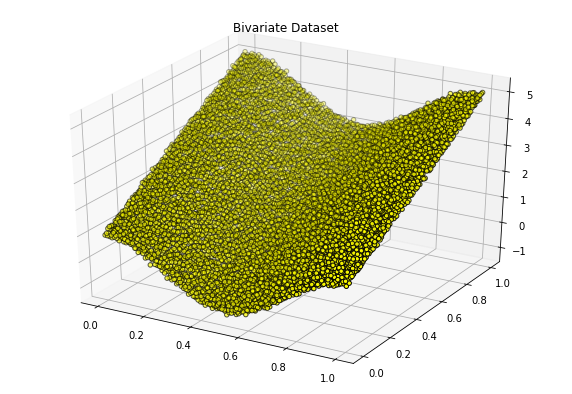

In [ ]:
plot(dataset)

## Train Test Split (70%-30%)

In [ ]:
def train_test_split(data):
  row, col = data.shape
  n = int(0.7*row)
  train = data[:n]
  test = data[n:row]
  return train, test

In [ ]:
train_data, test_data = train_test_split(dataset)

# Perceptron Training Model


In [ ]:
np.random.seed(0)
def perceptron_model_train(train_data):
  N, d = train_data.shape
  theta = np.array([.6,.4,.3])
  epochs=100
  avg_err = []
  mse=[]
  while(epochs):
    error=[]   

    for i in range(N):
      
      x = [1,train_data[i,0],train_data[i,1]]
      y_op = train_data[i, 2]
      
      a=np.dot(theta.T,x) #activation value
      y_pred = a #linear activation function      
      
      eta = 0.001
      theta = theta + eta*np.dot(y_op-y_pred,x)
      e = 0.5*(y_op - y_pred)**2
      error.append(e)
      
      

    avg = sum(error)/len(error)
    avg_err.append(avg)
    epochs = epochs-1

  return theta, avg_err 


In [ ]:
theta, avg_err = perceptron_model_train(train_data)

# Testing

In [ ]:
def perceptron_test(test_data, theta):
    N=len(test_data)
    z_pred_list = []
    err=[]
    for i in range(N):
       z_true=test_data[i, 2]
       z_pred=np.dot(theta.T, [1, test_data[i, 0],test_data[i, 1]])
       e=(z_true-z_pred)**2
      #  print(e)
       z_pred_list.append(z_pred)
       err.append(e)
    mse=sum(err)/len(err)       

    
    return z_pred_list,mse

z_pred_ts,msets = perceptron_test(test_data, theta)
z_pred_tr,msetr = perceptron_test(train_data, theta)


# Results

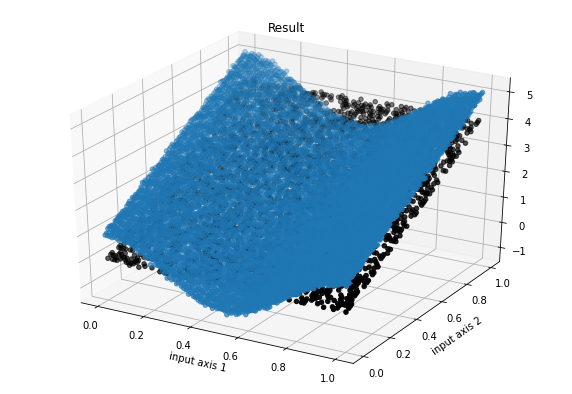

In [ ]:
x , y , z = dataset[:,0] , dataset[:,1] , dataset[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
  # Creating plot
ax.scatter3D(x, y, z )
ax.scatter3D(test_data[:,0], test_data[:,1], z_pred_ts , color="black")
  # show plot  
plt.title("Result")
plt.xlabel("input axis 1")
plt.ylabel("input axis 2")
plt.savefig("/content/drive/MyDrive/Group05/results/2D_result.png")

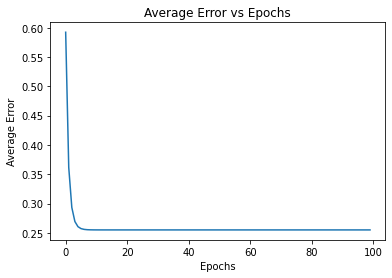

In [ ]:
plt.plot(avg_err)
plt.title("Average Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.savefig("/content/drive/MyDrive/Group05/results/2D_errorvsepoch.png")
plt.show()

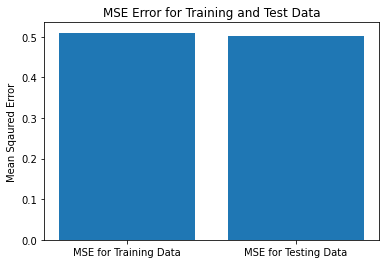

In [ ]:
x=["MSE for Training Data","MSE for Testing Data"]
y=[msetr,msets]

plt.bar(x,y)

plt.title("MSE Error for Training and Test Data")
plt.ylabel("Mean Sqaured Error")
plt.savefig("/content/drive/MyDrive/Group05/results/mse2D.png")
plt.show()

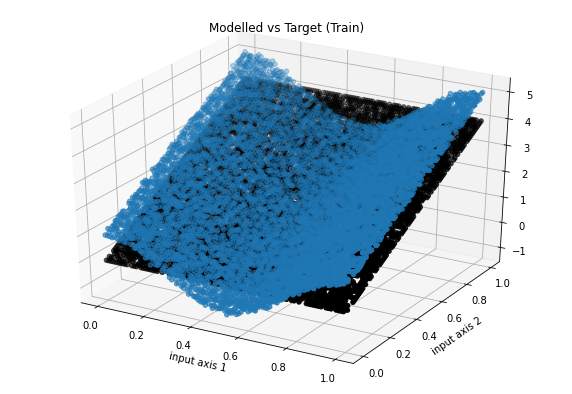

In [ ]:
x , y , z = train_data[:,0] , train_data[:,1] , train_data[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
  # Creating plot
ax.scatter3D(x, y, z)
ax.scatter3D(train_data[:,0], train_data[:,1], z_pred_tr , color="black")
  # show plot 
plt.xlabel("input axis 1")
plt.ylabel("input axis 2") 
plt.title("Modelled vs Target (Train)")
plt.savefig("/content/drive/MyDrive/Group05/results/2D_train_result.png")

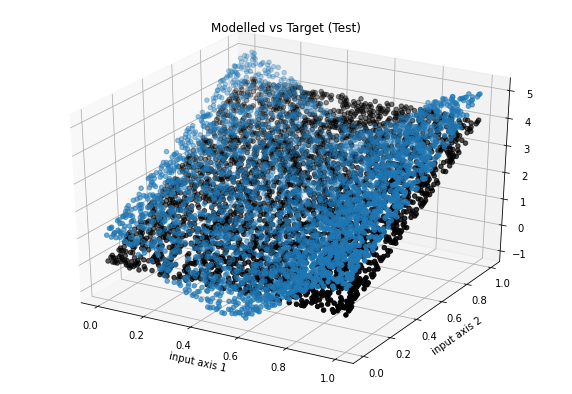

In [ ]:
x , y , z = test_data[:,0] , test_data[:,1] , test_data[:,2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
  # Creating plot
ax.scatter3D(x, y, z)
ax.scatter3D(test_data[:,0], test_data[:,1], z_pred_ts , color="black")
  # show plot 
plt.xlabel("input axis 1")
plt.ylabel("input axis 2") 
plt.title("Modelled vs Target (Test)")
plt.savefig("/content/drive/MyDrive/Group05/results/2D__test_result.png")

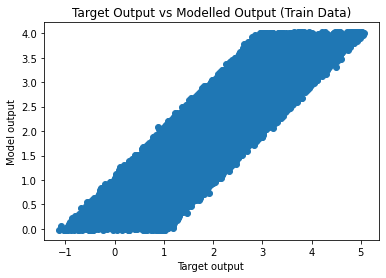

In [ ]:
plt.scatter(train_data[:,2],z_pred_tr)  
plt.title("Target Output vs Modelled Output (Train Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.savefig("/content/drive/MyDrive/Group05/results/4Bivarate_train.png")

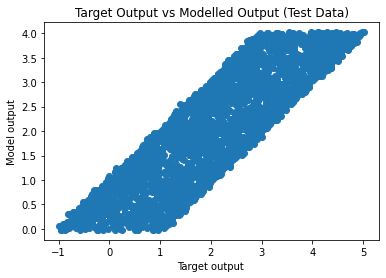

In [ ]:
plt.scatter(test_data[:,2],z_pred_ts)
plt.title("Target Output vs Modelled Output (Test Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.savefig("/content/drive/MyDrive/Group05/results/4Bivarate_test.png")